# DESIGNING OSCILLATORS

The objective here is to design a reaction network that generates oscillations
that can be controlled as to their:
* frequency $\alpha$
* amplitude $H$
* offset (translation) so that the midpoint is $M$
* phase $D$

In [1]:
import tellurium as te
import sympy
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import control

init_printing()

In [2]:
TIMES = [0.01*n for n in range(500)]

In [3]:
S1, S2, k1, k2, k3, k4, d, T, D, r1, r2, a, t, x1_0, x2_0, u1, u2, b1, b2, m1, m2, h1, h2 =   \
   sympy.symbols("S1, S2, k1, k2, k3, k4, d, T, D, r1, r2, a, t, x1_0, x2_0, u1, u2, b1, b2, m1, m2, h1, h2", real=True)
c1, c2 = sympy.symbols("c1, c2")

In [4]:
S1, S2, k1, k2, k3, k4,a =  sympy.symbols("S1, S2, k1, k2, k3, k4, a", real=True, positive=True)

In [5]:
I = sympy.sqrt(-1)
sympy.simplify(I*I)

# Notation

**Scalars**

* $N$ is the number of chemical species (state variables)
* $n$ indexes chemical species
* $M$ is the number of reactions
* $m$ indexes reactions

**Vectors and Matrices**

* ${\bf x}$ ($N \times 1$) is the state vector
* ${\bf k}$ ($M \times 1$) is a vector of parameters
* ${\bf u}$ is the input vector
* ${\bf B}$ is the constant input matrix
* ${\bf A}$ is the constant state transition matrix
* ${\bf N}$ ($N \times M$) is the constant stoichiometry matrix
* ${\bf V}$ ($M \times N$) is the flux vector
* $\dot{ {\bf x}} = {\bf A} {\bf x} + {\bf B}{\bf u}$ is the time derivative of state


* A **reaction network** is a system of ODEs that can be realized by a collection of reactions where the concentration of chemical species are the state variables.

* A **linear reaction network (LRN)** is a reaction network with kinetics that form a system of linear ODEs.

* A **uni-reactant, mass action reaction network (UMRN)** is a reaction network in which all reactions have a single reactant and the kinetics are mass action.

* Two networks are **compatible** if they have the same chemical species. We can always make two networks compatible by including missing species, although there will be no reactions with those species.

The goal of this analysis is to characterize how changes in reaction rates and/or structure affect eigenvalues, especially: (a) stability and (b) oscillations.

**Claim**: ${\bf A}$ specifies a UMRN system iff
there are ${\bf A} = {\bf N} {\bf V}$ such that:
* Every column in ${\bf N}$ has exactly one negative value.
* Every row in ${\bf V}$ has exactly one non-zero value.

**Observations for a UMRN**
* If ${\bf A}$ specifies a UMRA, then $r {\bf A}$ is a UMRA for $r \geq 0$.
* If ${\bf A}$, ${\bf A}^{\prime}$ are for compatible UMRN systems, then ${\bf A} + {\bf A}^{\prime}$ specifies a UMRA system.

**Possible Claim**: If ${\bf A}$ specifies a LRA, then exists UMRA matrices ${\bf N}$, ${\bf V}$ such that ${\bf A} = {\bf N} {\bf V}$.

**Claim**: A UMRA is an LRA.

**Proof**: 

**Claim**: Consider an UMRA with state variable Jacobian ${\bf A}$
and eigenvalues $\lambda_1, \cdots, \lambda_N$.
Consider a second UMRA that consists entirely of autocatyltic reactions
so that $\dot{x} = a x$, $a > 0$ for all state variables $x$.
Then, the combination of these two networks has the eigenvalues
$\lambda_1 + a, \cdots, \lambda_N +a$.

This claim allows us to change the real part of the eigenvalues.

For the Jacobian ${\bf A}$, the characteristic equation is
$p(\lambda) = |{\bf A} - \lambda {\bf I}| = 0$.

$p(\lambda)$ can be expressed in the following ways.
1. $p(\lambda) = \sum_{n=0}^N \alpha_n \lambda^n$
1. $p(\lambda) = \Pi_{n=1}^N (\lambda - \lambda_n)$
1. $p(\lambda) = \sum_{\sigma} sign(\sigma) \Pi_{n=1}^N (a_{n, \sigma(n)} - \phi_{n, \sigma(n)} \lambda)$, where $\phi_{n_1, n_2} = 1 \iff n_1 = n_2$.

In the foregoing, $\sigma$ is a permutation of $(1, \cdots, N)$,
and $sign(\sigma)$ is $(-1)^n$, where $n$ is the number of pairwise exchanges to construct the permutation from the identity permutation.

Suppose that initially ${\bf A}$ is diagonal with $a_{nn} < 0$.
That is, the network consists entirely of degradation reactions,
and let $p$ be the characteristic polynomial for this network.
Now consider ${\bf A}^{\prime}$ that adds to this network
the reactions
$x_1 \rightarrow m_2 x_2$ at rate $k_1$, where $m_2$ is the stoichiometry of the species $x_2$,
and $x_2 \rightarrow m_1 x_1$ at rate $k_2$.
Let $p^{\prime}$ be the characteristic polynomial for this network.
${\bf A}^D = {\bf A}^{\prime} - {\bf A}$ has 3 non-zero entries:
* $a^D_{1,1} = -k_1$
* $a^D_{1,2} = m_2 k_1$
* $a^D_{2, 1} = m_1 k_2$
* $a^D_{2,2} = -k_2$

Further, define $p_{1,2} (\lambda) = \Pi_{n\neq1,2} (\lambda - \lambda_n)$.
$p(\lambda) = p_{1,2}(\lambda) (\lambda - \lambda_1)(\lambda - \lambda_2) $.
$p^{\prime} (\lambda) = p_{1,2}(\lambda)
\left( (\lambda - \lambda_1)(\lambda - \lambda_2) - a^D_{1,2} a^D_{2,1} \right)$.

[Is this correct? I should get an imaginary result?]

A key consideration is determining if a cubic equation has a pure imaginary root.

Consider 
\begin{eqnarray}
p(\lambda) & = & (\lambda - r)(\lambda - ib)(\lambda + ib) \\
& = & (\lambda -r)(\lambda^2 + b^2) \\
& = & \lambda^3 - r \lambda^2 + b^2 \lambda - r b^2 \\
& = & A \lambda^3 - B \lambda^2 + C \lambda - D \\
\end{eqnarray}
where $A = 1$.

Observed that the roots are easily determined from the coefficients of the terms.
A simple check is that $D = BC$, and $B, C, D$ are functions of ${\bf k}$.

Consider the objective function $min_{\bf k} |D - BC|$. The one concern here is that all eigenvalues are non-positive.


Construct a explicit expression for the cubic equation for a 3 state system.

# Oscillating System

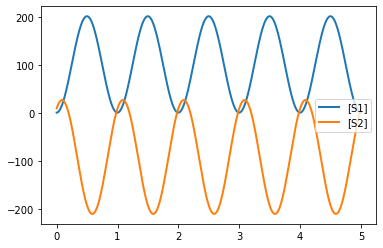

In [6]:
MODEL = """
S1 -> 2 S1; k1*S1
S1 -> S2; k2*S1
S2 -> ; k3*S1
S2 -> S1; k4*S2
S1 -> ; -u1
-> S2; u2

k2 = 1
k4 = -1     # assigned based parameterization
delta = -1  # assigned based on parameterization
k1 = k2 + k4
k3 = k1 + delta
u1 = -100
u2 = 500

S1 = 1
S2 = 10

"""
# Positive values: u1 = -100, u2=500, period=0.1
# a: alpha, d: delta
period = 1
frequency_in_time = 1/period
frequency_in_radians = frequency_in_time*2*np.pi
PARAM_DCT = {"k2": 1.0, "k4": 10.0, "a": frequency_in_radians}
PARAM_DCT["k1"] = PARAM_DCT["k2"] + PARAM_DCT["k4"]
PARAM_DCT["d"] = (frequency_in_radians**2)/PARAM_DCT["k4"]
PARAM_DCT["k3"] = PARAM_DCT["k1"] + PARAM_DCT["d"]
rr = te.loada(MODEL)
names = ["S1", "S2", "u1", "u2"]
for name in names:
    PARAM_DCT[name] = rr[name]
for k, v in PARAM_DCT.items():
    if k in rr.keys():
        rr[k] = v
data = rr.simulate(0, 5, 1000)
rr.plot(data)

In [7]:
df = pd.DataFrame(data, columns=data.colnames)
df.min(), df.max()

(time      0.000000
 [S1]      0.992360
 [S2]   -209.812789
 dtype: float64,
 time      5.000000
 [S1]    201.650536
 [S2]     27.171088
 dtype: float64)

In [8]:
PARAM_DCT

{'k2': 1.0,
 'k4': 10.0,
 'a': 6.283185307179586,
 'k1': 11.0,
 'd': 3.947841760435743,
 'k3': 14.947841760435743,
 'S1': 1.0,
 'S2': 10.0,
 'u1': -100.0,
 'u2': 500.0}

In [9]:
np.sqrt(PARAM_DCT["k4"]*PARAM_DCT["d"]), PARAM_DCT["a"]

# Helpers

In [10]:
def pp(arr):
    print(pd.DataFrame(arr))

In [11]:
def makeTimes(start_time=0, end_time=5, point_density=10):
    return [1/point_density*n for n in range(start_time, point_density*end_time+1)]
# TESTS
end_time = 10
point_density = 2
times = makeTimes(end_time=end_time, point_density=point_density)
assert(len(times) == point_density*end_time+1)

In [12]:
# Simulation of the model
def simulateLinearSystem(A=None, B=None, is_plot=True):
    """
    Simulates the linear system specified by A and B
    """
    if A is None:
        A = np.array([ [PARAM_DCT["k1"] - PARAM_DCT["k2"], PARAM_DCT["k4"]],
                           [PARAM_DCT["k2"] - PARAM_DCT["k3"], - PARAM_DCT["k4"] ] ])
    if B is None:
        B = np.eye(2)
    C = np.eye(2)
    D = 0*np.eye(2)
    sys = control.StateSpace(A, B, C, D)
    sys = control.LinearIOSystem(sys, inputs=["S1", "S2"], outputs=["S1", "S2"])
    X0 = [1, 10]
    times = makeTimes(end_time=20)
    response = control.input_output_response(sys, T=times, X0=X0)
    plt.plot(response.t, response.y[0])
    plt.plot(response.t, response.y[1])
    plt.legend(["S1", "S2"], loc="upper left")
    if not is_plot:
        plt.close()
    
# Tests
simulateLinearSystem(is_plot=False)

In [13]:
def simulateSymbol(sym, dct, times=TIMES, is_plot=True):
    """
    Simulates a symbol that is a function of time.
    The time symbol must be "t".
    
    Parameters
    ----------
    sym: sympy.Symbol
    t: sympy.Symbol
    dct: dict (substitutions)
    
    Returns
    -------
    list-float
    """
    # Find the time symbol
    time_syms = [a for a in sym.atoms() if str(a) == "t"]
    if len(time_syms) == 0:
        raise ValueError("No time found!")
    if len(time_syms) > 1:
        raise ValueError("Multiple times found!")
    t = time_syms[0]
    # Simulation of ivp_solution
    new_sym = sym.subs(dct)
    vals = [float(sympy.simplify(new_sym.subs(t, v))) for v in times]
    if is_plot:
        plt.plot(times, vals)
    return vals

values = simulateSymbol(t, {}, is_plot=False)
np.testing.assert_array_equal(values, TIMES)
print("OK!")

OK!


In [14]:
def simulateSymbolVector(vec, dct, is_plot=True):
    """
    Simulates a 2-d vector symbol that is a function of time.
    The time symbol must be "t".
    
    Parameters
    ----------
    sym: sympy.Symbol
    dct: dict (substitutions)
    """
    s1_vals = simulateSymbol(vec[0], dct, times=TIMES)
    s2_vals = simulateSymbol(vec[1], dct, times=TIMES)
    #
    plt.plot(TIMES, s1_vals)
    plt.plot(TIMES, s2_vals)
    _ = plt.legend(["S1", "S2"])
    if not is_plot:
        plt.close()
    
vec = sympy.Matrix([t, t**2])
_ = simulateSymbolVector(vec, {}, is_plot=False)
print("OK!")

OK!


In [15]:
def simulateRR(dct={}, is_plot=True):
    """
    Simulates the model with parameter updates as indicated.
    """
    rr = te.loada(MODEL)
    for key, value in PARAM_DCT.items():
        if key in rr.keys():
            rr[key] = value
    for key, value in dct.items():
        if key in rr.keys():
            rr[key] = value
    data = rr.simulate(0, 5, 1000)
    for col in data.colnames[1:]:
        plt.plot(data[:, 0], data[col])
    plt.legend(data.colnames[1:])
    if not is_plot:
        plt.close()
    
# Tests
simulateRR(is_plot=False)
print("OK!")

OK!


# Solution for Two Species System

Consider an URMA network consisting of $S_1$, $S_2$.

Let ${\bf A} =
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix}
$
Denote the determinant by $D = a_{11} a_{22} - a_{12} a_{21}$
and the trace by $T = a_{11} + a_{22}$. The eigenvalues are
$\lambda = \frac{1}{2} \left( - T \pm \sqrt{T^2 - 4 D} \right)$.
So, to get pure imaginary eigenvalues, $T = 0$
and $D > 0$.

$T = 0$ implies that either the diagonal is zero or
one diagonal term is positive and the other is negative.
In either case, it must be that one of the off-diagonal terms is negative.

We can obtain a positive value for a diagonal term by having self-catlytic reactions, such as $S_1 \rightarrow S_1 + S_1$
with mass action kinetics $k S_1$.
We can obtain a negative value for an off-diagonal term by having
degrading reactions catlyzed by the other element, such as
$S_2 \rightarrow ∅$ with kinetics $k S_1 S_2$. Note that these are non-linear kinetics that might be approximated by linear kinetics. 

**Issue**
1. Why is period 10 instead of 5?

## System Equations

This system equations are:
$
\begin{eqnarray}
\dot{S}_1 & = & k_1 S_1 + k_4 S_2 - k_2 S_1 \\
\dot{S}_2 & = & - k_3 S_1 + k_2 S_1 - k_4 S_2 \\
\end{eqnarray}
$

Let ${\bf x} = 
\begin{pmatrix}
S_1 \\
S_2 \\
\end{pmatrix}
$, and
$
{\bf A} = 
\begin{pmatrix}
k_1 - k_2 & k_4 \\
k_2 - k_3 & -k_4 \\
\end{pmatrix}
$.

The full model is:
$\dot{\bf x} = {\bf A} {\bf x} + {\bf u}$.

Note that
\begin{eqnarray}
T & = & tr(A) = k_1 -k_2 - k_4 \\
D & = & det(A) = (k_1 - k_2)(-k_4) - k_4 (k_2 - k_3) \\
& = & k_4 (k_3 - k_1) \\
\end{eqnarray}

## Jacobian for Pure Imaginary Eigenvalues

The eigenvalues a $2 \times 2$ matrix are

$\lambda = - \frac{T \pm \sqrt{T^2 - 4 D}}{2}$.

The pole $\lambda$ is pure imaginary (i.e., $\sqrt{D}i$) if:
1. $T = 0$. That is, $k_1 = k_2 + k_4$.
1. $D > 0$. That is, $k_3 > k_1$.

$D > 0 \iff k_4(k_3 - k_1) > 0$.
Clearly $k_4 > 0$ since $D>0$, and so we can divide by $k_4$.
So, we have the criteria is $k_3 = k_1 + \delta$ for $\delta >0$.


Note that if $tr({\bf A}) = 0$ and $D >0$:
1. $k_1 = k_2 + k_4$.
1. $k_3 = \delta + k_2 + k_4$, $\delta > 0$.

$
{\bf A} =
\begin{pmatrix}
k_1 - k_2 & k_4 \\
k_2 - k_3 & -k_4 \\
\end{pmatrix}
$.

Substituting,
${\bf A} =
\begin{pmatrix}
k_2 + k_4 - k_2 & k_4 \\
k_2 - \delta - k_2 - k_4 & -k_4 \\
\end{pmatrix}
=
\begin{pmatrix}
k_4 & k_4 \\
-\delta -k_4 & -k_4 \\
\end{pmatrix}
$.

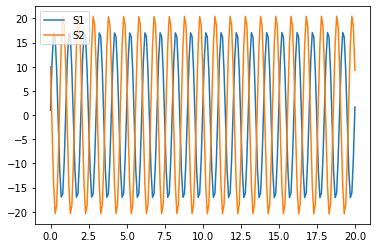

In [16]:
# Validation plot
A = np.array([ [PARAM_DCT["k4"], PARAM_DCT["k4"]],
                           [-PARAM_DCT["d"] - PARAM_DCT["k4"], - PARAM_DCT["k4"] ] ])
simulateLinearSystem(A=A)

In [17]:
# Period requires converting from radians
1/(np.sqrt(PARAM_DCT["d"]*PARAM_DCT["k4"])/(2*np.pi))

## Eigenvectors for Pure Imaginary Eigenvalues

In [18]:

A = sympy.Matrix([ [k4 , k4], [-d-k4, -k4]])
A

⎡  k₄     k₄ ⎤
⎢            ⎥
⎣-d - k₄  -k₄⎦

Note that since $\delta > 0$, ${\bf A}$ is nonsingular.

In [19]:
A.inv()

⎡ -1     -1 ⎤
⎢ ───    ───⎥
⎢  d      d ⎥
⎢           ⎥
⎢1    1   1 ⎥
⎢── + ─   ─ ⎥
⎣k₄   d   d ⎦

In [20]:
A.eigenvects()

⎡⎛                   ⎡⎡  ____   ____         ⎤⎤⎞  ⎛                  ⎡⎡    ___
⎢⎜                   ⎢⎢╲╱ k₄ ⋅╲╱ -d      k₄  ⎥⎥⎟  ⎜                  ⎢⎢  ╲╱ k₄
⎢⎜   ____   ____     ⎢⎢───────────── - ──────⎥⎥⎟  ⎜  ____   ____     ⎢⎢- ─────
⎢⎜-╲╱ k₄ ⋅╲╱ -d , 1, ⎢⎢    d + k₄      d + k₄⎥⎥⎟, ⎜╲╱ k₄ ⋅╲╱ -d , 1, ⎢⎢      d
⎢⎜                   ⎢⎢                      ⎥⎥⎟  ⎜                  ⎢⎢       
⎣⎝                   ⎣⎣          1           ⎦⎦⎠  ⎝                  ⎣⎣       

_   ____         ⎤⎤⎞⎤
 ⋅╲╱ -d      k₄  ⎥⎥⎟⎥
──────── - ──────⎥⎥⎟⎥
 + k₄      d + k₄⎥⎥⎟⎥
                 ⎥⎥⎟⎥
    1            ⎦⎦⎠⎦

### Validate the eigenvectors

In [21]:
vec = A.eigenvects()[0][2][0]
vec

⎡  ____   ____         ⎤
⎢╲╱ k₄ ⋅╲╱ -d      k₄  ⎥
⎢───────────── - ──────⎥
⎢    d + k₄      d + k₄⎥
⎢                      ⎥
⎣          1           ⎦

In [22]:
# First eigenvalue, eigenvector
vec = A.eigenvects()[0][2][0]
sympy.simplify((-sympy.eye(2)*sympy.sqrt(-d *k4) - A)*vec)

⎡0⎤
⎢ ⎥
⎣0⎦

In [23]:
# Second eigenvalue, eigenvector
vec = A.eigenvects()[1][2][0]
sympy.simplify((sympy.eye(2)*sympy.sqrt(-d *k4) - A)*vec)

⎡0⎤
⎢ ⎥
⎣0⎦

### Format eigenvectors

In [24]:
sympy.pretty_print(A.eigenvects()[0][2][0])
sympy.pretty_print(A.eigenvects()[1][2][0])

⎡  ____   ____         ⎤
⎢╲╱ k₄ ⋅╲╱ -d      k₄  ⎥
⎢───────────── - ──────⎥
⎢    d + k₄      d + k₄⎥
⎢                      ⎥
⎣          1           ⎦
⎡    ____   ____         ⎤
⎢  ╲╱ k₄ ⋅╲╱ -d      k₄  ⎥
⎢- ───────────── - ──────⎥
⎢      d + k₄      d + k₄⎥
⎢                        ⎥
⎣           1            ⎦


The eigenvalues are:

$
\begin{eqnarray}
\lambda_1 &=& - \sqrt{\delta k_4} i \\
\lambda_2 &=&  + \sqrt{\delta k_4} i
\end{eqnarray}
$

We define $\alpha = \sqrt{\delta k_4}$, and so
$\lambda_n = (-1)^n \alpha i$.

The eigenvectors are:

$
\begin{eqnarray}
{\bf e}_1 & = &
\left[\begin{matrix}- \frac{k_{4}}{\delta + k_{4}} - \frac{\alpha i}{\delta + k_{4}}\\1\end{matrix}\right] \\
{\bf e}_2 & = &
\left[\begin{matrix} - \frac{k_{4}}{\delta + k_{4}} + \frac{\alpha i}{d + k_{4}}\\1\end{matrix}\right] \\
\end{eqnarray}
$

## Solution to Homogeneous IVP

If the eigenvalue ${\bf e}$ and/or
vector $\lambda$ are complex, then
${\bf e} e^{\lambda} = {\bf v}_1 + i {\bf v}_2$ for
some real vectors ${\bf v}_n$.
By theorem, the ${\bf v}_n$ are independent solutions to
the differential equation
and so the solution to the IVP
is $\sum_{n=1}^2 c_n v_n$ for $c_n$ chosen
based on the initial values.

In [67]:
# Construct the vectors for the homogeneous IVP solution
e_vec = sympy.Matrix([ [-k4/(k4 + d) - a/(d + k4)*I], [1]])*(sympy.exp(I*a*t))
e_vec

⎡⎛   ⅈ⋅a       k₄  ⎞  ⅈ⋅a⋅t⎤
⎢⎜- ────── - ──────⎟⋅ℯ     ⎥
⎢⎝  d + k₄   d + k₄⎠       ⎥
⎢                          ⎥
⎢           ⅈ⋅a⋅t          ⎥
⎣          ℯ               ⎦

In [70]:
vecs = e_vec.as_real_imag()
vecs

⎛⎡a⋅sin(a⋅t)   k₄⋅cos(a⋅t)⎤  ⎡  a⋅cos(a⋅t)   k₄⋅sin(a⋅t)⎤⎞
⎜⎢────────── - ───────────⎥  ⎢- ────────── - ───────────⎥⎟
⎜⎢  d + k₄        d + k₄  ⎥, ⎢    d + k₄        d + k₄  ⎥⎟
⎜⎢                        ⎥  ⎢                          ⎥⎟
⎝⎣        cos(a⋅t)        ⎦  ⎣         sin(a⋅t)         ⎦⎠

In [68]:
FUND_MAT = sympy.Matrix([ [vecs[0][0], vecs[1][0]], [vecs[0][1], vecs[1][1]]])
FUND_MAT  # Fundamental matrix

⎡a⋅sin(a⋅t)   k₄⋅cos(a⋅t)    a⋅cos(a⋅t)   k₄⋅sin(a⋅t)⎤
⎢────────── - ───────────  - ────────── - ───────────⎥
⎢  d + k₄        d + k₄        d + k₄        d + k₄  ⎥
⎢                                                    ⎥
⎣        cos(a⋅t)                   sin(a⋅t)         ⎦

The solution to the homogenous equation has the form:

In [29]:
c1*vecs[0] + c2*vecs[1]

⎡c₁⋅(-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)) + c₂⋅(-r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t))⎤
⎢                                                                 ⎥
⎣                    c₁⋅cos(a⋅t) + c₂⋅sin(a⋅t)                    ⎦

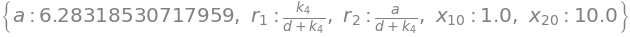

In [25]:
DCT = {r1: k4/(d + k4), r2: a/(d + k4), x1_0: PARAM_DCT["S1"], x2_0: PARAM_DCT["S2"],
      a: np.sqrt(PARAM_DCT["d"]*PARAM_DCT["k4"])}
DCT

In [30]:
x = sympy.Matrix([ [x1_0], [x2_0]])
x

⎡x₁ ₀⎤
⎢    ⎥
⎣x₂ ₀⎦

In [31]:
# Solve for c1, c2
expr = x - c1*vecs[0] - c2*vecs[1]
expr.subs(t, 0)

⎡c₁⋅r₁ + c₂⋅r₂ + x₁ ₀⎤
⎢                    ⎥
⎣     -c₁ + x₂ ₀     ⎦

In [32]:
constant_dct = sympy.simplify(sympy.solve(expr.subs(t, 0), [c1, c2]))
constants = list(constant_dct.values())
constant_dct

In [33]:
for k, v in PARAM_DCT.items():
    DCT[eval(k)] = v
DCT = {k: v.subs(DCT) if not isinstance(v, float) else v for k, v in DCT.items()}
DCT

In [34]:
constant_dct[c1].subs(DCT), constant_dct[c2].subs(DCT)

### Explicit IVP Solution

In [35]:

ivp_solution = constants[0]*vecs[0] + constants[1]*vecs[1]
xh = ivp_solution
xh

⎡                                    (-r₁⋅x₂ ₀ - x₁ ₀)⋅(-r₁⋅sin(a⋅t) - r₂⋅cos(
⎢x₂ ₀⋅(-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)) + ─────────────────────────────────────────
⎢                                                          r₂                 
⎢                                                                             
⎢                                    (-r₁⋅x₂ ₀ - x₁ ₀)⋅sin(a⋅t)               
⎢                    x₂ ₀⋅cos(a⋅t) + ──────────────────────────               
⎣                                                r₂                           

a⋅t))⎤
─────⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

### Evaluation of IVP Solution

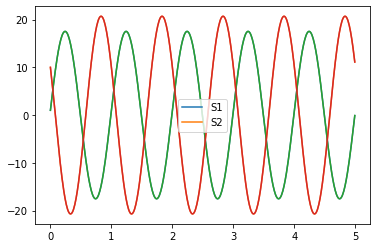

In [36]:
simulateSymbolVector(xh, DCT)

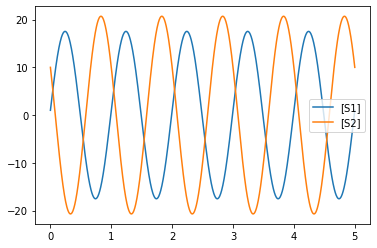

In [37]:
simulateRR(dct={"u1": 0, "u2":0})

## Solution for Nonhomogeneous System

Here we consider forced inputs.
The solution with forced inputs has the form
${\bf x}^H + {\bf x}^P$, where ${\bf x}^H$
is a solution to the homogeneous system and ${\bf x}^P$ is a particular solution.

Recall the following for solutions of nonhomogeneous systems.
Let ${\bf X}$ be the fundamental matrix for $\dot{\bf x} = {\bf A} {\bf x} + {\bf u}$.
We want to construct a particular solution
${\bf x}^P = {\bf X} {\bf v}$, for the unknown vector ${\bf v}$.

Substituting,

\begin{eqnarray}
\dot{\bf X} {\bf v} + {\bf X} \dot{\bf v} & = & {\bf A} {\bf X} {\bf v} + {\bf u} \\
{\bf A} {\bf X} {\bf v} + {\bf X} \dot{\bf v} & = & {\bf A} {\bf X} {\bf v} + {\bf u} \\
{\bf X} \dot{\bf v} & = & {\bf u} \\
{\bf v} = \int \left( {\bf X}^{-1} {\bf u} \right)dt
\end{eqnarray}

Note that there is an integration constant as well, but this need not be considered
since all values of the constant still result in a valid particular solution.

In [38]:
rhs = sympy.simplify(FUND_MAT.inv()*sympy.Matrix([[u1], [u2]]))
rhs = sympy.integrate(rhs, t)
rhs

⎡  r₁⋅u₂⋅cos(a⋅t)   r₂⋅u₂⋅sin(a⋅t)   u₁⋅cos(a⋅t)⎤
⎢- ────────────── + ────────────── - ───────────⎥
⎢        a                a               a     ⎥
⎢───────────────────────────────────────────────⎥
⎢                       r₂                      ⎥
⎢                                               ⎥
⎢  r₁⋅u₂⋅sin(a⋅t)   r₂⋅u₂⋅cos(a⋅t)   u₁⋅sin(a⋅t)⎥
⎢- ────────────── - ────────────── - ───────────⎥
⎢        a                a               a     ⎥
⎢───────────────────────────────────────────────⎥
⎣                       r₂                      ⎦

In [39]:
FUND_MAT

⎡-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)  -r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t)⎤
⎢                                                      ⎥
⎣         cos(a⋅t)                    sin(a⋅t)         ⎦

In [40]:
xhh = FUND_MAT*sympy.Matrix([[c1], [c2]])
xhh

⎡c₁⋅(-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)) + c₂⋅(-r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t))⎤
⎢                                                                 ⎥
⎣                    c₁⋅cos(a⋅t) + c₂⋅sin(a⋅t)                    ⎦

In [41]:
xp = sympy.simplify(FUND_MAT*rhs)
xp

⎡  2                2   ⎤
⎢r₁ ⋅u₂ + r₁⋅u₁ + r₂ ⋅u₂⎥
⎢───────────────────────⎥
⎢          a⋅r₂         ⎥
⎢                       ⎥
⎢    -(r₁⋅u₂ + u₁)      ⎥
⎢    ──────────────     ⎥
⎣         a⋅r₂          ⎦

In [42]:
nonh_solution = xhh + xp
nonh_solution

⎡                                                                      2      
⎢                                                                    r₁ ⋅u₂ + 
⎢c₁⋅(-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)) + c₂⋅(-r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t)) + ─────────
⎢                                                                             
⎢                                                                             
⎢                                                      r₁⋅u₂ + u₁             
⎢                          c₁⋅cos(a⋅t) + c₂⋅sin(a⋅t) - ──────────             
⎣                                                         a⋅r₂                

          2   ⎤
r₁⋅u₁ + r₂ ⋅u₂⎥
──────────────⎥
 a⋅r₂         ⎥
              ⎥
              ⎥
              ⎥
              ⎦

In [43]:
cdct = sympy.solve(nonh_solution.subs(t, 0) - sympy.Matrix([ [x1_0], [x2_0]]), [c1, c2])

In [44]:
nonh_solution = nonh_solution.subs(cdct)
nonh_solution

⎡                                                                             
⎢(-r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t))⋅(-a⋅r₁⋅x₂ ₀ - a⋅x₁ ₀ + r₂⋅u₂)   (-r₁⋅cos(a⋅t) + 
⎢────────────────────────────────────────────────────────── + ────────────────
⎢                           a⋅r₂                                              
⎢                                                                             
⎢                           r₁⋅u₂ + u₁   (-a⋅r₁⋅x₂ ₀ - a⋅x₁ ₀ + r₂⋅u₂)⋅sin(a⋅t
⎢                         - ────────── + ─────────────────────────────────────
⎣                              a⋅r₂                       a⋅r₂                

                                          2                2   ⎤
r₂⋅sin(a⋅t))⋅(a⋅r₂⋅x₂ ₀ + r₁⋅u₂ + u₁)   r₁ ⋅u₂ + r₁⋅u₁ + r₂ ⋅u₂⎥
───────────────────────────────────── + ───────────────────────⎥
         a⋅r₂                                     a⋅r₂         ⎥
                                                               ⎥
)   (a⋅r₂⋅x₂ ₀ + r₁⋅u₂ + u₁)⋅cos(a⋅t)     

In [45]:
nonh_solution.subs(DCT).subs(DCT)

⎡1.59154943091895⋅sin(6.28318530717959⋅t) - 100.321183642338⋅cos(6.28318530717
⎢                                                                             
⎣61.4421092751212⋅sin(6.28318530717959⋅t) + 101.321183642338⋅cos(6.28318530717

959⋅t) + 101.321183642338⎤
                         ⎥
959⋅t) - 91.3211836423378⎦

In [46]:
nonh_solution.subs(u1, 0).subs(u2, 0).subs(DCT)

⎡ 17.5070437401085⋅sin(6.28318530717959⋅t) + 1.0⋅cos(6.28318530717959⋅t) ⎤
⎢                                                                        ⎥
⎣-18.1353622708264⋅sin(6.28318530717959⋅t) + 10.0⋅cos(6.28318530717959⋅t)⎦

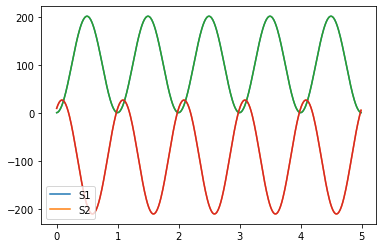

In [47]:
result1 = simulateSymbolVector(nonh_solution, DCT)

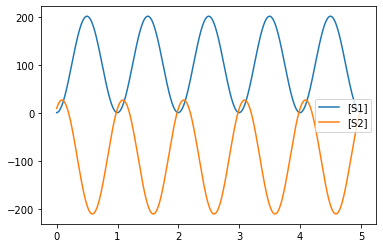

In [48]:
dct = dict(PARAM_DCT)
if False:
    dct["u1"] = 0
    dct["u2"] = 0
simulateRR(dct=dct)

# Designing an Oscillator

The parameters of the oscillator are:
* kinetics parameters: $k_4$, $\delta$ (which then determine $k_1$, $k_3$, and $k_2$ doesn't matter)
* initial conditions for species: $x_n (0)$, $n \in \{1, 2\}$
* forced inputs: $u_1, u_2$

Given a desired frequency $\alpha$, amplitude $h_1, h_2$, and
midpoint $m_1, m_2$, find values of the parameters that achieve this.

$r_1 = \frac{k_4}{k_4 + \delta}$
and $r_2 = \frac{\alpha}{\delta + k_4}$,
where $\alpha = \sqrt{\delta k_4}$.

A key fact is that a linear combination of sinusoids at the same frequency is also a sinusoid 
at the same frequency but with a phase displacement and a new amplitude.

Let $y = a \times cos(\alpha) + b \times sin(\alpha)$.
Let $A = \sqrt{a^2 + b^2}$ and 
$D = arctan(\frac{b}{a})$.
Then $y = A \times cos(\alpha - D)$.

In [49]:
dct = {r1: k4/(k4 + d), r2: a/ (d + k4)}
xf = sympy.simplify(nonh_solution.subs(dct).subs(dct))
#xf = sympy.simplify(nonh_solution.subs({sympy.cos(a*t): -sympy.sin(a*t)}))

In [50]:
def removeFactor(sym, factor_str):
    """
    Removes any of the symbolic factors
    """
    result = 1
    for tt in sym.args:
        if not factor_str in str(tt):
            result *= tt
    return result

def separateTerms(sym):
    """
    Separates the terms in a scalar expression into:
        constants
        coefficient of sin(at)
        coefficient of cost(at)
    """
    constants = []
    sints = []
    costs = []
    # Partition the entire expression of a sum of multiplied terms
    for term in sym.expand().args:
        if "cos(" in str(term):
            costs.append(removeFactor(term, "cos"))
        elif "sin(" in str(term):
            sints.append(removeFactor(term, "sin"))
        else:
            constants.append(term)
    return constants, sints, costs

def sumTerms(terms):
    result = 0
    for term in terms:
        result += term
    return sympy.simplify(result)

def calcCoefficients(sym):
    """
    Calculates the coefficients for the constant, sin, and cos terms
    """
    constants, sints, costs = separateTerms(sym)
    return sumTerms(constants), sumTerms(sints), sumTerms(costs)

def getCosine(sym):
    terms = sym.expand().args
    for term in terms:
        if "cos(" in str(term):
            for element in term.args:
                if "cos(" in str(element):
                    return element
            

def refactorSinusoids(sym):
    """
    Combines linear combinations of cos and sin into a single term.
    """
    cos_arg = getCosine(sym).args[0]
    constant, coef_sin, coef_cos = calcCoefficients(sym)
    amplitude = sympy.sqrt(coef_sin**2 + coef_cos**2)
    phase = sympy.atan(coef_sin/coef_cos)
    offset = sympy.Piecewise((0, coef_cos >= 0), (sympy.pi, coef_cos < 0))
    result = constant + amplitude*sympy.cos(cos_arg - phase + offset)
    return result
    

# TESTS
#sym = xf.expand()[0]
#constants, sints, costs = separateTerms(sym)
#const_term, sin_term, cos_term = calcCoefficients(sym)
xf1 = refactorSinusoids(xf.expand()[0])
xf2 = refactorSinusoids(xf.expand()[1])
refactor_vec = sympy.Matrix([xf1, xf2])
            
            
            

**TO DO**
1. Simplify the following.

In [51]:
refactor_vec

⎡       ______________________________________________________________________
⎢      ╱                                                           2          
⎢     ╱  ⎛ 2                             2          2             ⎞    ⎛ 2    
⎢    ╱   ⎝a ⋅x₂ ₀ + d⋅k₄⋅x₁ ₀ + d⋅u₁ + k₄ ⋅x₁ ₀ + k₄ ⋅x₂ ₀ + k₄⋅u₁⎠    ⎝a ⋅d⋅x
⎢   ╱    ─────────────────────────────────────────────────────────── + ───────
⎢  ╱                              2         2                                 
⎢╲╱                              a ⋅(d + k₄)                                  
⎢                                                                             
⎢                                                                             
⎢                                                                 ____________
⎢                                                                ╱            
⎢                                                               ╱             
⎢                                                   

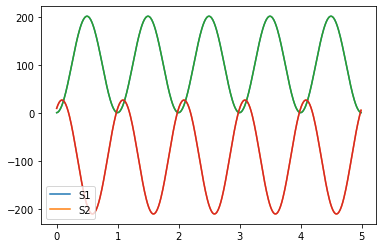

In [52]:
sym = simulateSymbolVector(refactor_vec, DCT)

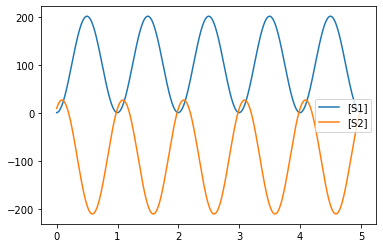

In [53]:
simulateRR(DCT)

**TO DO**
1. Validate by resimulating
1. Approximate for low and high frequency

Proceed by considering the cases of small $\alpha$ and large $\alpha$.

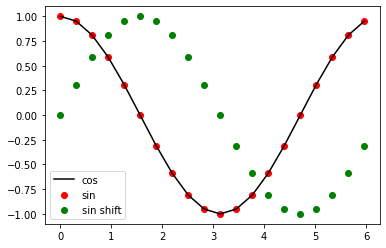

In [54]:
angles = 2*np.pi*np.array(range(20))*1/20
cost = np.cos(angles)
sint = np.sin(angles)
sin_shift = np.sin(np.pi/2+angles)
plt.scatter(angles, cost, color="red")
plt.scatter(angles, sint, color="green")
plt.plot(angles, sin_shift, color="black")
plt.legend(["cos", "sin", "sin shift"])

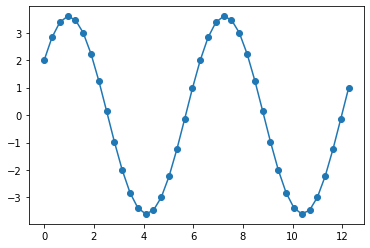

In [55]:
angles = 2*np.pi*np.array(range(40))*1/20
a1 = 2
a2 = 3
cost = a1*np.cos(angles)
sint = a2*np.sin(angles)
new_a = np.sqrt(a1**2 + a2**2)
new_d = np.arctan(a2/a1)
new_cos = new_a*np.cos(angles - new_d)
plt.scatter(angles, cost+sint)
plt.plot(angles, new_cos)

In [56]:
DCT

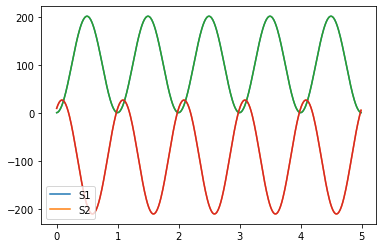

In [57]:
simulateSymbolVector(xf, DCT)

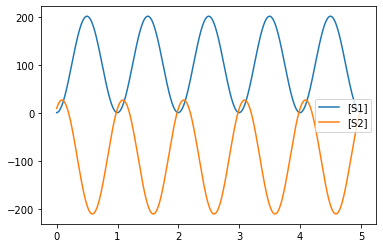

In [58]:
simulateRR(DCT)

## Solutions

In [59]:
xf1 = xf[0]
xf2 = xf[1]

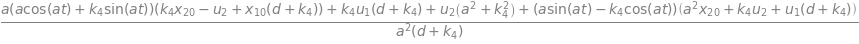

In [60]:
xf1

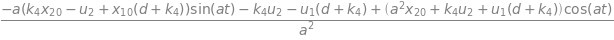

In [61]:
xf2

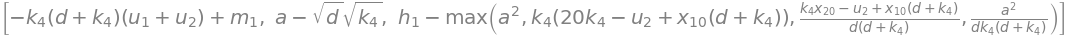

In [62]:
eqns = [m1 - (𝑘4*(𝑑+𝑘4)*(𝑢1+𝑢2)), a - sympy.sqrt(d*k4),
       h1 - sympy.Max(a**2, k4*(𝑘4*20 - 𝑢2+ 𝑥1_0*(𝑑+𝑘4)), 
                     a**2/(d*k4*(d + k4)), k4*(𝑘4*𝑥2_0 - 
                                               𝑢2+𝑥1_0*(𝑑+𝑘4))/(d*k4*(d + k4)))]
eqns

In [63]:
design_solutions = {a: sympy.sqrt(d*k4),
                    h1: sympy.Max( 
                                  sympy.Abs(((a**2)*x1_0 + x2_0*a**2 + d*u1)/(a*d)),
                                  sympy.Abs(-u1 -u2 + x1_0)/d + x1_0/d),
                    m1: a*u1-a*u2,
                    h2: sympy.Max(
                        sympy.Abs(-a*𝑘4*𝑥2_0 - a*𝑥1_0*(𝑑+𝑘4)+𝑢2*𝑑*𝑘4)/(a**2),
                        
                        sympy.Abs((a*𝑥2_0*d*𝑘4+𝑘4*u2+u1*(d+𝑘4)))/(a**2)
                    ),
                    m2: -k4*u2-u1*(d+k4)/a**2
                                  }

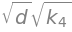

In [64]:
design_solutions[a]

# Notes
1. Develop the idea of a UMRA approximation to a non-linear network.
  1. For mas action networks with two reactants, create two separate uni-reactant reactions. How select the kinetics constants in the approximation to most accurate estimate the original network. The kinetics constants can be approximated using a Taylor's series or by an orthogonal projection for an appropriately defined inner product space.

1. Note that the eigenvalues are ${\bf e} = \{ \lambda |  det \left( {\bf A} - \lambda {\bf I} \right) = 0 \}$.
Since ${\bf A} = {\bf H} + {\bf K}$,
$ {\bf A} - \lambda {\bf I}  = {\bf H} + {\bf K} - \lambda {\bf I}$.

1. Note that $det \left( {\bf A} - \lambda {\bf I} \right)
= \left( {\bf N V} - \lambda {\bf I} \right)$.
Further, $det \left( {\bf N} - \lambda {\bf I} \right) \left(
 {\bf V} - \lambda {\bf I} \right)$
 $= det \left[ {\bf N}{\bf V} - \lambda {\bf N} - \lambda {\bf V} + I \right]$. Can I use information about the [sum of determinants](https://www.geeksforgeeks.org/eigen-values-and-eigen-vectors/) to figure out
 how $\lambda$ changes if $k_m$ changes?

1. From ["Facts about Eigenvalues"](https://www.adelaide.edu.au/mathslearning/ua/media/120/evalue-magic-tricks-handout.pdf), I know that for a polynomial function $g(x)$, $g({\bf A})$ has eigenvalues $g(\lambda_1), \cdots, g(\lambda_n)$ for the matrix ${\bf A}$ with eigenvalues $\lambda_1, \cdots, \lambda_n$.
So, it's easy to transform ${\bf A}$ in a way that preserves
UMRN so that the dominant eigenvalue is at 0 by subtracting along
the diagonal.
The challenge is making the this eigenvalue have a non-zero imaginary component.

1. Note that in the decomposition into Hermitian and skew Hermitian matrices ${\bf A} = {\bf H} + {\bf K}$, the diagonal of ${\bf K}$ must be zero if ${\bf A}$ is real valued.
So, how can ${\bf K}$ be transformed to create imaginary eigenvalues?

1. Might consider using the polar decomposition, where ${\bf A} = {\bf U} {\bf P}$, where ${\bf U}$ is unitary and ${\bf P}$ is positiv semidefinite. My hypothesis is that if ${\bf U}$ is a rotation other than $n \pi$, then ${\bf A}$ has at least one imaginary eigenvalue. I still have the challenge of making the *dominant* eigenvalue have a non-zero imaginary part.

1. Try exploring matrices and their decompositions to understand the criteria for obtaining eigenvalues with a non-zero imaginary part.

1. **Issue**: Not getting the correct period


# Other Oscilators

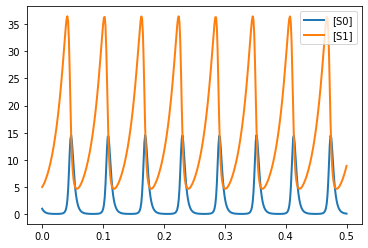

In [65]:
# Evolved oscillator
r = te.loada ('''
var S0
var S1
ext S2
S1 -> S1+S1; k0*S1
S1 + S0 -> S0 + S0; k1*S1*S0
S0 -> ; k2*S0
k0 = 54
k1 = 22
k2 = 340
S0 = 1.0
S1 = 5.0
S2 = 9.0
''')
m = r.simulate (0, 0.5, 400)
r.plot()

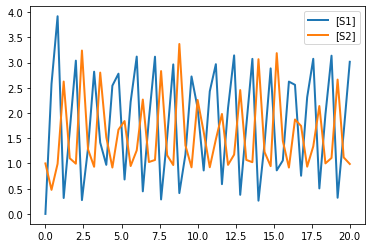

In [66]:
model = """
// Oscillator (Heinrich model)
// From the review:
// Metabolic Regulation and Mathematical Models
// R.HEINRICH, S.M.RAPOPORT, T.A.RAPOPORT
// In Progress in Biophysics and Molecular Biology
// 1977, Vol 32, p1-82

// Reactions:
J0: $X0 -> S1; v0
J1: S1 -> ; k3*S1
J2: S1 -> S2; (k1*S1 - k_1*S2)*(1 + c*S2^q)
J3: S2 ->; k2*S2

// Species initializations
S1 = 0; S2 = 1; X0 = 1

// Variable initializations
v0 = 8; k3 = 0
k1 = 1; k_1 = 0
c = 1;  q = 3
k2 = 5;
"""
rr = te.loada(model)
rr.simulate(0, 20)
rr.plot()

# Save

The homogeneous system is $\dot{\bf x} = {\bf A} {\bf x}$.
Consider
Its solution has the for
${\bf x}(t) = \sum _{n=1}^2 c_n {\bf e}_n e^{\lambda_n t}$.

The homogeneous system is $\dot{\bf x} = {\bf A} {\bf x}$.
Its solution has the for
${\bf x}(t) = \sum _{n=1}^2 c_n {\bf e}_n e^{\lambda_n t}$.

Note that $e^{\pm \alpha i } = cos(\alpha ) \pm i sin(\alpha )$.
In the following, $\alpha = \sqrt{\delta k_4}$.
So

$
\begin{eqnarray}
{\bf x} (t) & = & c_1 {\bf e}_1 e^{\lambda_1 t} + c_2 {\bf e}_2 e^{\lambda_2 t} \\
& = & c_1 {\bf e}_1 \left[ cos (\alpha t) - i sin(\alpha t) \right] 
+ c_2 {\bf e}_2 [ cos (\alpha t) + i sin(\alpha t) ]  \\
& = &
c_1 \left[\begin{matrix} - \frac{k_{4}}{\delta - k_{4}} [cos(\alpha) - i sin(\alpha)]  -
\frac{\alpha i}{d + k_{4}}[cos(\alpha) - i sin(\alpha)]\\
cos(\alpha) - i sin(\alpha)
\end{matrix}\right] +
c_2 \left[\begin{matrix} - \frac{k_{4}}{\delta + k_{4}} [cos(\alpha) + i sin(\alpha)]  + \frac{\alpha i}{d + k_{4}}[cos(\alpha) + i sin(\alpha)]\\
cos(\alpha) + i sin(\alpha)
\end{matrix}\right] \\
& = &
2c \left[ \begin{matrix} -\frac{k_4}{\delta + k_4}cos(\alpha t) -\frac{\alpha}{\delta + k_4}sin(\alpha t) \\
  cos(\alpha t)
\end{matrix} \right]
\end{eqnarray}
$.

There is no solution that is consistent with the assumption that the
eigenvalues are pure imaginary.
Note that in order to get real values for the solution, we must have $c_1 = c = c_2$.
So, $c = \frac{x_2(0)}{2}$.
But $c = -\frac{x_1(0) [k_4 + \delta]}{2 k_4}$.

Make this into a sum of real and imaginary values.
$
\begin{eqnarray}
& = &
 \left[\begin{matrix} - \frac{k_{4}}{\delta - k_{4}} [c_1 + c_2] cos(\alpha) +
\frac{\alpha i}{d + k_{4}}[c_2 - c_1]\\
c_1 + c_2
\end{matrix}\right]  \\
& ~~ + &
 \left[\begin{matrix} - \frac{k_{4}}{\delta - k_{4}} [- c_1 + c_2]  +
\frac{\alpha i}{d + k_{4}}[c_2 + c_1]\\
- c_1 + c_2
\end{matrix}\right] i sin(\alpha) 
\end{eqnarray}
$.


Let $r_1 = \frac{k_4}{k_4 + \delta}$
and $r_2 = \frac{\alpha}{\delta + k_4}$,
where $\alpha = \sqrt{\delta k_4}$.

Given $r_1, r_2, \alpha$, find $k_4, \delta, \alpha$

$k_4 = \frac{\alpha^2}{\delta}$

\begin{eqnarray}
\delta & =&  \frac{\frac{\alpha^2}{\delta} - r_1 \frac{\alpha^2}{\delta}}{r_1}\\
& = & \sqrt{\frac{\alpha^2 - r_1 \alpha^2}{r_1}}\\
\end{eqnarray}

\begin{eqnarray}
k_4 & =&  \frac{\alpha^2}{\sqrt{\frac{\alpha^2 - r_1 \alpha^2}{r_1}}} \\
& =&  \sqrt{\frac{r_1}{1 - r_1 }} \\
\end{eqnarray}

\begin{eqnarray}
\alpha & =&  r_2 (\delta + k_4) \\
\end{eqnarray}